# Transpower EPD Temp for Load Forecast

Looking at the ePD forecast in 2022

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

verif_folder = '/home/benv/data/verification'

In [2]:
tp_sites = pd.read_csv('/home/benv/data/transpower_weightings.csv', index_col=0)
tp_sites

,Primary_Site,Primary_Site_Name,Weight,First_Alternate,First_Alternate_Name,Second_Alternate,Second_Alternate_Name
Region,,,,,,,
Auckland,93110,Auckland Aero AWS,100.00,93119,Auckland Aero,93112,Whenuapai
Bay_Of_Plenty,93247,Rotorua Aero AWS,31.68,93246,Rotorua Aero,93245,Taupo AWS
Bay_Of_Plenty,93186,Tauranga Aero AWS,57.62,93185,Tauranga Aero,93146,Paeroa AWS
Bay_Of_Plenty,93191,Whakatane Aero AWS,10.70,93190,Whakatane Aero,93186,Tauranga Aero AWS
Christchurch,93781,Christchurch Aero AWS,91.97,93780,Christchurch Aero,93678,Kaikoura AWS
Christchurch,93709,Haast AWS,0.09,93615,Hokitika Aero AWS,93800,Secretary Is AWS
Christchurch,93678,Kaikoura AWS,0.58,93781,Christchurch Aero AWS,93579,Blenheim Aero AWS
Christchurch,93773,Timaru Aero AWS,7.36,93772,Timaru Aero,93796,Oamaru Aero AWS
Hamilton,93173,Hamilton Aero AWS,84.31,93172,Hamilton Aero,93146,Paeroa AWS


In [5]:
list(tp_sites['Primary_Site'].unique())

[93110,
 93247,
 93186,
 93191,
 93781,
 93709,
 93678,
 93773,
 93173,
 93146,
 93245,
 93339,
 93891,
 93864,
 93845,
 93834,
 93811,
 93796,
 93831,
 93909,
 93729,
 93023,
 93057,
 93292,
 93467,
 93373,
 93313,
 93410,
 93309,
 93404,
 93327,
 93579,
 93615,
 93546,
 93515,
 93420,
 93439]

In [23]:
pd.read_parquet(verif_folder + f'/2022/DLITE/TTTTT/93110_leadtime_mean.parquet', columns=['mae']).reset_index().assign(lead_time = lambda x: x.prognosis_period/pd.Timedelta(1, 'H')).drop(columns=['prognosis_period','pdf_index'])

,mae,lead_time
0,0.737861,0.0
1,0.738749,1.0
2,0.740922,2.0
3,0.728687,3.0
4,0.688552,4.0
...,...,...
368,1.710216,368.0
369,1.614510,369.0
370,1.580121,370.0
371,1.553169,371.0


In [26]:
models_mae = pd.DataFrame()
for site in tp_sites['Primary_Site']:
    try:
        models_mae = pd.concat([models_mae,
                             (pd.read_parquet(verif_folder + f'/2022/ePD/TTTTT/{site}_leadtime_mean.parquet', columns=['mae'])
                              .reset_index()
                                .assign(site = site, model = 'ePD')
                                .assign(lead_time = lambda x: x.prognosis_period/pd.Timedelta(1, 'H'))
                                .drop(columns=['prognosis_period']))
                                ], axis=0)
    except:
        try:
            models_mae = pd.concat([models_mae,
                                  (pd.read_parquet(verif_folder + f'/2022/DLITE/TTTTT/{site}_leadtime_mean.parquet', columns=['mae'])
                                   .reset_index()
                                   .assign(site = site, model = 'ePD')
                                   .assign(lead_time = lambda x: x.prognosis_period/pd.Timedelta(1, 'H'))
                                   .drop(columns=['prognosis_period','pdf_index']))
                                   ], axis=0)
        except:
            pass
    try:
        models_mae = pd.concat([models_mae,
                             (pd.read_parquet(verif_folder + f'/2022/DRN2_ARWECMWFcld_single_nz4km/TTTTT/{site}_leadtime_mean.parquet', columns=['nwp_mae'])
                              .reset_index()
                              .assign(site = site, model = 'WRF_EC4km').rename(columns={'nwp_mae':'mae'})
                              .assign(lead_time = lambda x: x.prognosis_period/pd.Timedelta(1, 'H'))
                                .drop(columns=['prognosis_period']))
                                ], axis=0)
    except:
        pass

models_mae = models_mae.reset_index().merge(tp_sites.reset_index().iloc[:,:4], how='left', left_on='site', right_on='Primary_Site')
models_mae

,index,mae,site,model,lead_time,Region,Primary_Site,Primary_Site_Name,Weight
0,0,0.737861,93110,ePD,0.0,Auckland,93110,Auckland Aero AWS,100.00
1,1,0.738749,93110,ePD,1.0,Auckland,93110,Auckland Aero AWS,100.00
2,2,0.740922,93110,ePD,2.0,Auckland,93110,Auckland Aero AWS,100.00
3,3,0.728687,93110,ePD,3.0,Auckland,93110,Auckland Aero AWS,100.00
4,4,0.688552,93110,ePD,4.0,Auckland,93110,Auckland Aero AWS,100.00
...,...,...,...,...,...,...,...,...,...
15617,80,1.214391,93439,WRF_EC4km,80.0,Wellington,93439,Wellington Aero AWS,90.98
15618,81,1.207547,93439,WRF_EC4km,81.0,Wellington,93439,Wellington Aero AWS,90.98
15619,82,1.227502,93439,WRF_EC4km,82.0,Wellington,93439,Wellington Aero AWS,90.98
15620,83,1.315274,93439,WRF_EC4km,83.0,Wellington,93439,Wellington Aero AWS,90.98


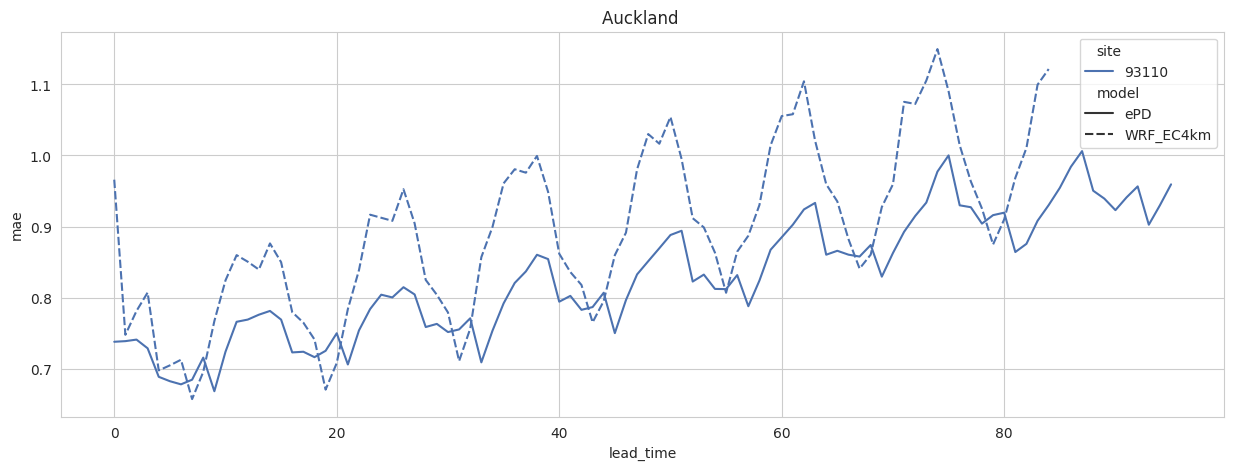

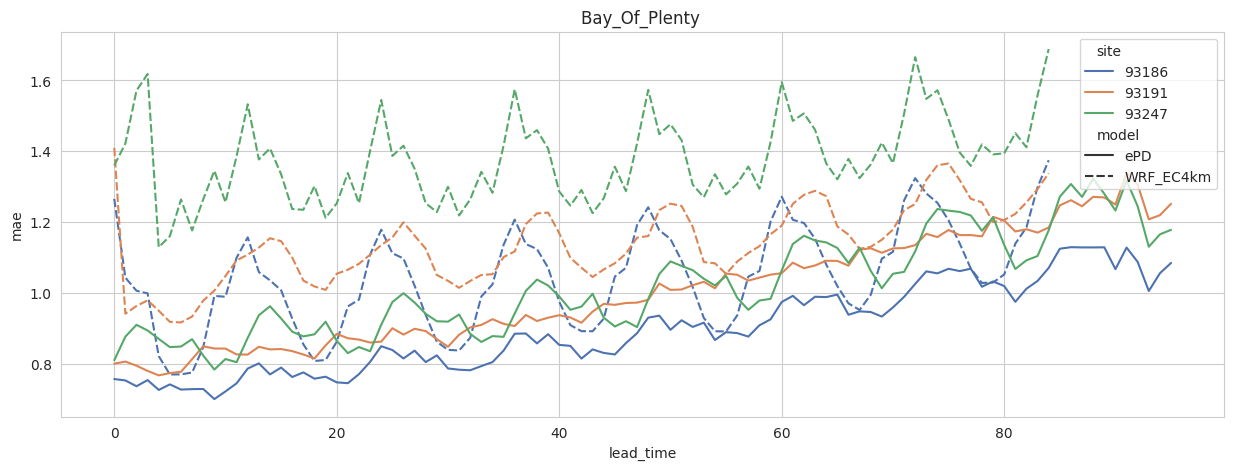

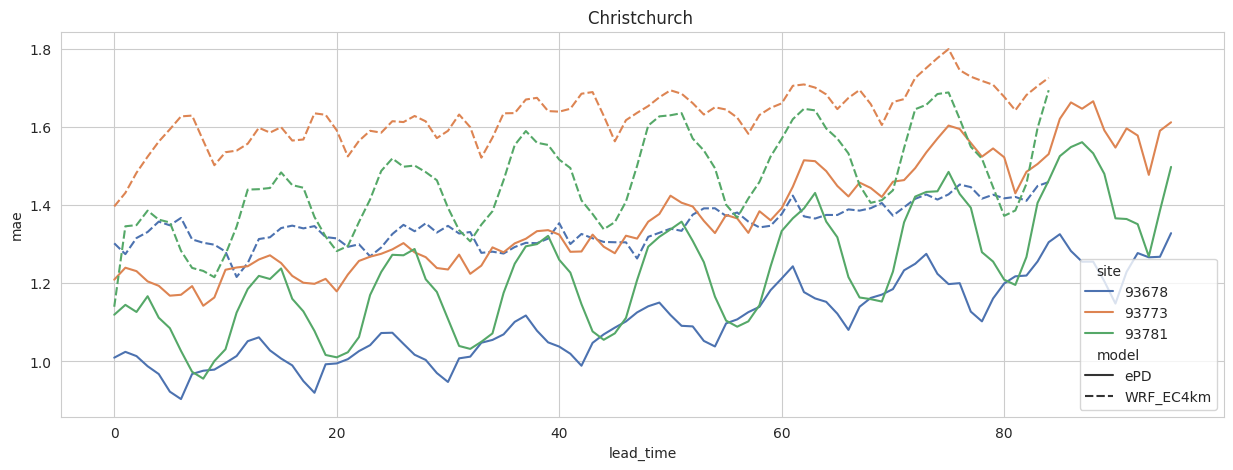

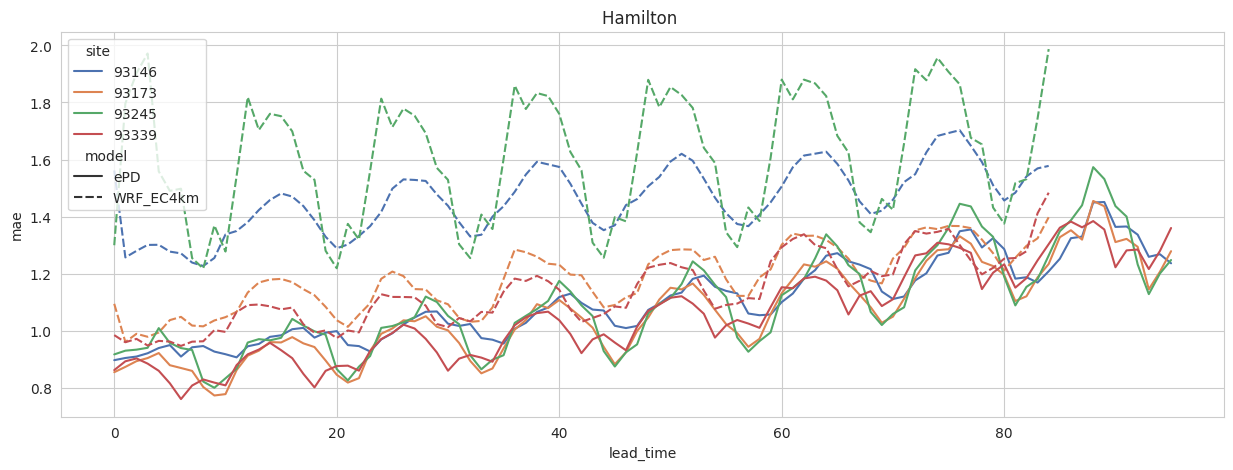

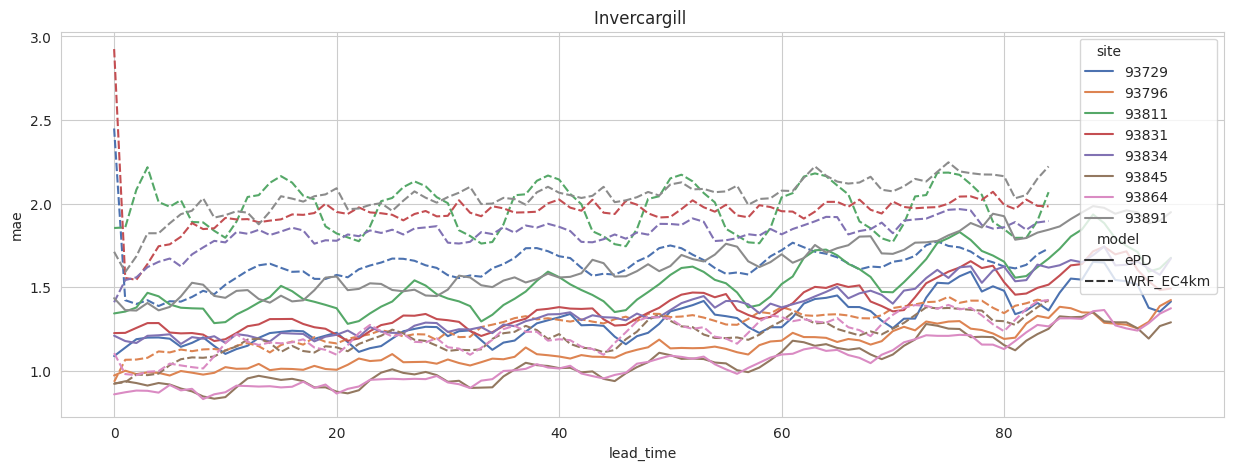

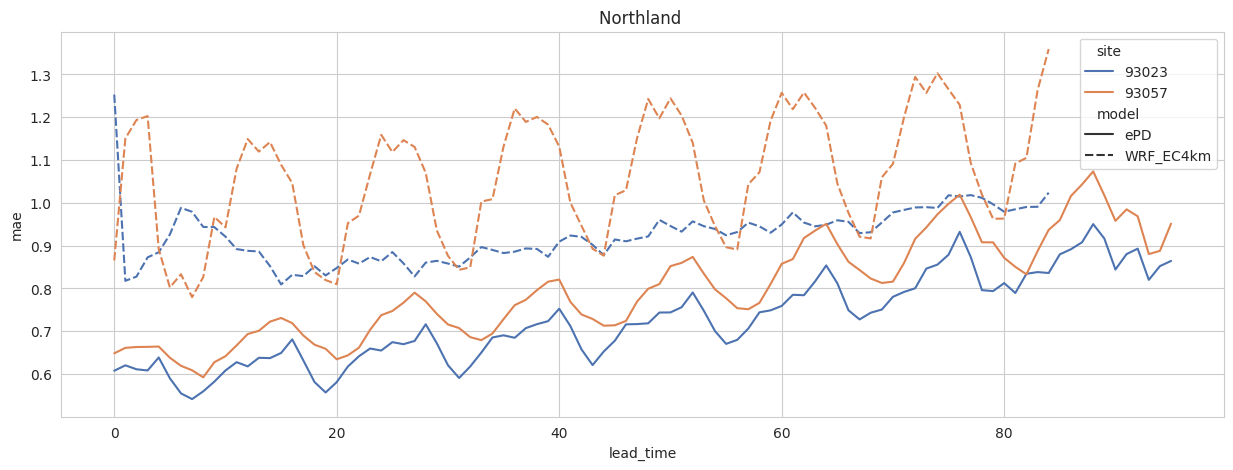

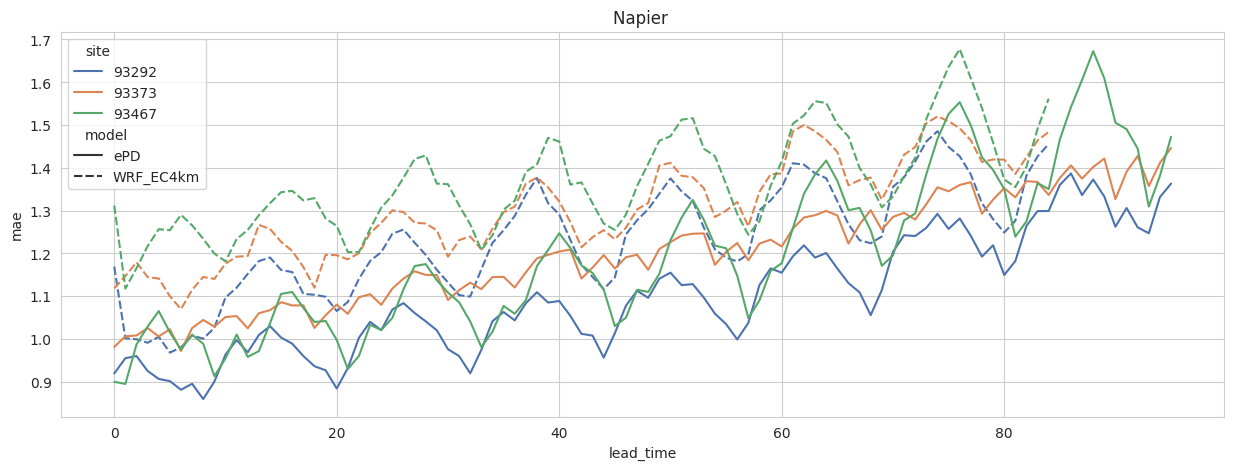

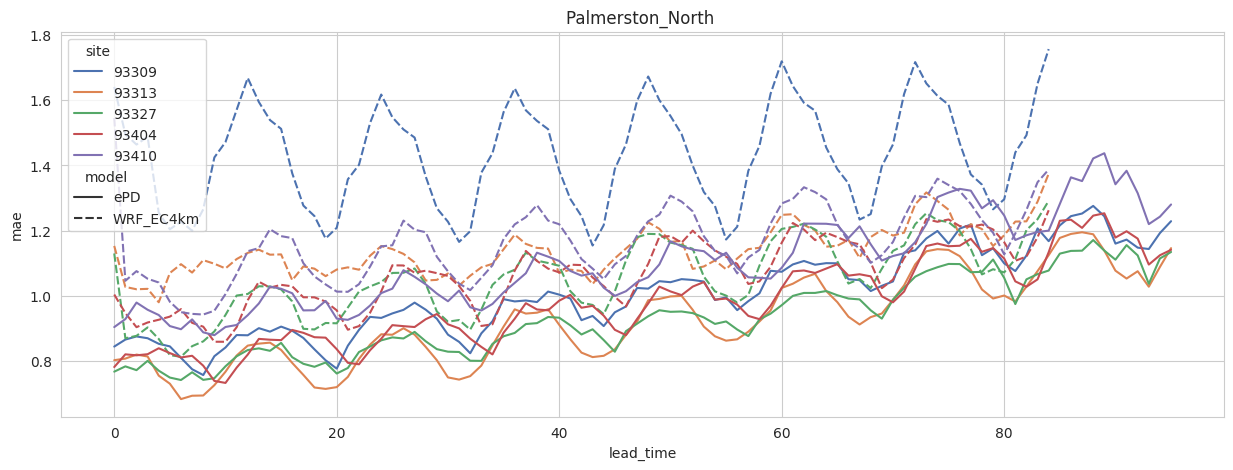

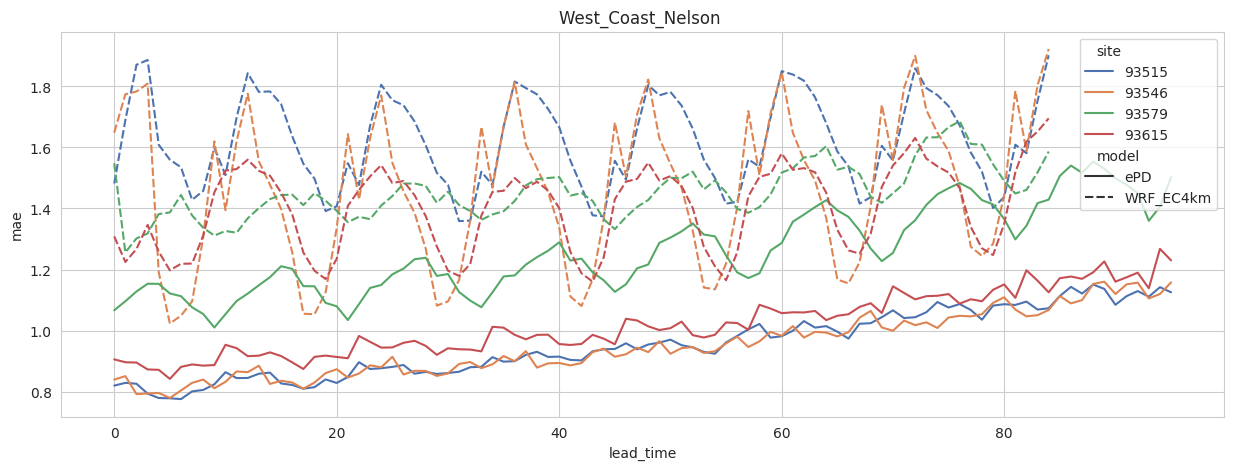

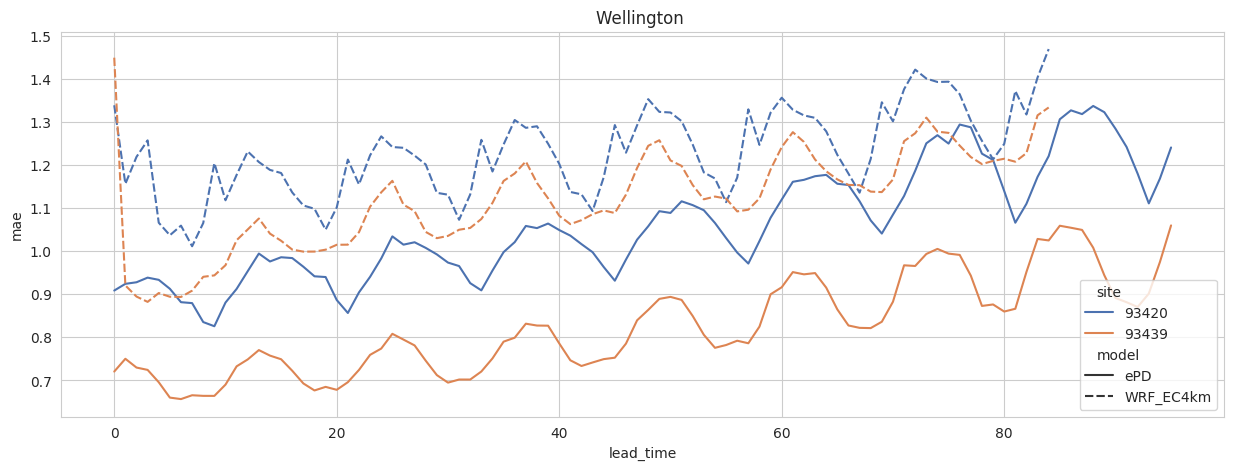

In [41]:
for region in tp_sites.index.unique():
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(data=models_mae[(models_mae['Region']==region)& (models_mae['lead_time']<96)],
                 x='lead_time', y='mae', hue='site', style='model',palette="deep")
    plt.title(region)
    plt.show()